In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(299, 299)):
    """ Load and preprocess an image. """
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

def extract_features(image_folder, model, df):
    """ Extract features from all images in a folder using a pre-trained model and align with labels. """
    features = []
    labels = []
    image_paths = [os.path.join(image_folder, fname) for fname in df['GalaxyID'].astype(str).add('.jpg')]
    image_paths = image_paths[:1000]
    for path in image_paths:
        img = preprocess_image(path)
        with tf.device('/CPU:0'):
            feature = model.predict(img)
        features.append(feature.flatten())  # Flatten the features to a 1D array
        labels.append(df.loc[df['GalaxyID'].astype(str).add('.jpg') == os.path.basename(path)].iloc[0, 1:].to_numpy())  # Assuming labels are in other columns
    return np.array(features), np.array(labels), image_paths

# Load the pre-trained model
base_model = Xception(weights=None, include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(37, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Load the saved weights
model.load_weights('best_model.keras')

# Load data
df = pd.read_csv('data/training_solutions_rev1.csv')
image_folder = 'data/images_training_rev1'

# Extract features
features, prob_labels, image_paths = extract_features(image_folder, model, df)

# Perform clustering with GMM
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(features)

ValueError: A total of 55 objects could not be loaded. Example error message for object <Conv2D name=block1_conv2, built=True>:

Layer 'block1_conv2' expected 1 variables, but received 0 variables during loading. Expected: ['kernel']

List of objects that could not be loaded:
[<Conv2D name=block1_conv2, built=True>, <BatchNormalization name=block1_conv2_bn, built=True>, <BatchNormalization name=block2_sepconv1_bn, built=True>, <SeparableConv2D name=block2_sepconv2, built=True>, <BatchNormalization name=block2_sepconv2_bn, built=True>, <Conv2D name=conv2d, built=True>, <SeparableConv2D name=block3_sepconv1, built=True>, <BatchNormalization name=block3_sepconv1_bn, built=True>, <SeparableConv2D name=block3_sepconv2, built=True>, <BatchNormalization name=block3_sepconv2_bn, built=True>, <Conv2D name=conv2d_1, built=True>, <BatchNormalization name=batch_normalization_1, built=True>, <SeparableConv2D name=block4_sepconv1, built=True>, <BatchNormalization name=block4_sepconv1_bn, built=True>, <SeparableConv2D name=block4_sepconv2, built=True>, <BatchNormalization name=block4_sepconv2_bn, built=True>, <Conv2D name=conv2d_2, built=True>, <BatchNormalization name=batch_normalization_2, built=True>, <SeparableConv2D name=block5_sepconv1, built=True>, <BatchNormalization name=block5_sepconv1_bn, built=True>, <SeparableConv2D name=block5_sepconv2, built=True>, <BatchNormalization name=block5_sepconv2_bn, built=True>, <SeparableConv2D name=block5_sepconv3, built=True>, <BatchNormalization name=block5_sepconv3_bn, built=True>, <SeparableConv2D name=block6_sepconv1, built=True>, <BatchNormalization name=block6_sepconv1_bn, built=True>, <BatchNormalization name=block6_sepconv2_bn, built=True>, <SeparableConv2D name=block6_sepconv3, built=True>, <BatchNormalization name=block7_sepconv1_bn, built=True>, <SeparableConv2D name=block7_sepconv2, built=True>, <BatchNormalization name=block7_sepconv3_bn, built=True>, <SeparableConv2D name=block8_sepconv1, built=True>, <BatchNormalization name=block8_sepconv2_bn, built=True>, <SeparableConv2D name=block8_sepconv3, built=True>, <BatchNormalization name=block9_sepconv1_bn, built=True>, <SeparableConv2D name=block9_sepconv2, built=True>, <BatchNormalization name=block9_sepconv3_bn, built=True>, <SeparableConv2D name=block10_sepconv1, built=True>, <BatchNormalization name=block10_sepconv2_bn, built=True>, <SeparableConv2D name=block10_sepconv3, built=True>, <BatchNormalization name=block11_sepconv1_bn, built=True>, <SeparableConv2D name=block11_sepconv2, built=True>, <BatchNormalization name=block11_sepconv3_bn, built=True>, <SeparableConv2D name=block12_sepconv1, built=True>, <BatchNormalization name=block12_sepconv2_bn, built=True>, <SeparableConv2D name=block12_sepconv3, built=True>, <BatchNormalization name=block13_sepconv1_bn, built=True>, <SeparableConv2D name=block13_sepconv2, built=True>, <BatchNormalization name=block13_sepconv2_bn, built=True>, <Conv2D name=conv2d_3, built=True>, <BatchNormalization name=batch_normalization_3, built=True>, <SeparableConv2D name=block14_sepconv1, built=True>, <BatchNormalization name=block14_sepconv1_bn, built=True>, <SeparableConv2D name=block14_sepconv2, built=True>, <BatchNormalization name=block14_sepconv2_bn, built=True>]

In [ ]:
def perform_tsne(features):
    """ Perform t-SNE to reduce dimensions for visualization. """
    tsne = TSNE(n_components=3, random_state=42)
    return tsne.fit_transform(features)

# Perform t-SNE
tsne_results = perform_tsne(features)

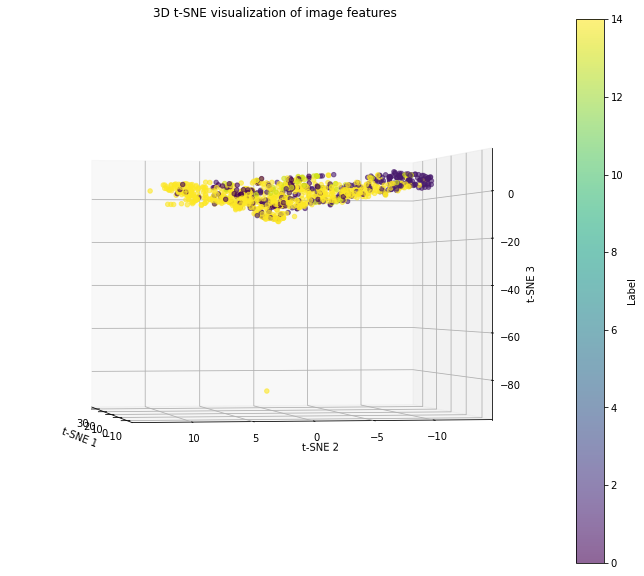

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'tsne_results' has three dimensions and 'prob_labels' are the soft labels
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Extracting the color mapping from the highest probability labels
colors = np.argmax(prob_labels, axis=1)

# Creating the 3D scatter plot
scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=colors, cmap='viridis', alpha=0.6)

# Adding a color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Label')

# Setting labels and title
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('3D t-SNE visualization of image features')
ax.view_init(elev=0, azim=170)
plt.show()


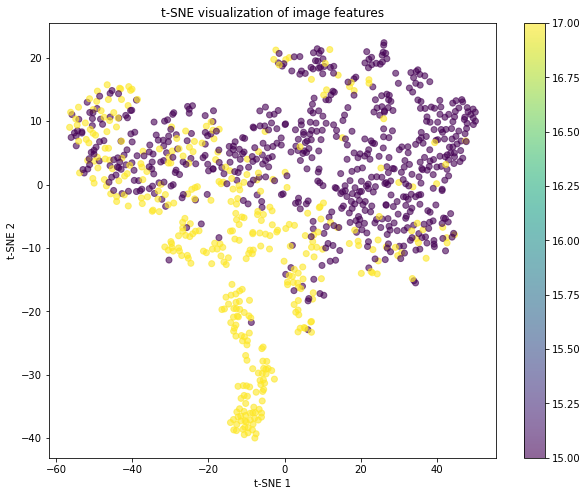

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Compute mask for selecting between label 16 and 18
def perform_tsne(features):
    """ Perform t-SNE to reduce dimensions for visualization. """
    tsne = TSNE(n_components=2, random_state=42)
    return tsne.fit_transform(features)

label_16_higher = prob_labels[:, 15] > prob_labels[:, 17]
selected_labels = np.where(label_16_higher, 15, 17)  # 16 where true, 18 where false

# Find indices for this condition
indices = np.arange(len(prob_labels))
filtered_indices = indices[label_16_higher | ~label_16_higher]  # All indices, but you can apply conditions here

# Filter the features based on these indices
filtered_features = features[filtered_indices]
filtered_selected_labels = selected_labels[filtered_indices]

# Perform t-SNE on the filtered features
filtered_tsne_results = perform_tsne(filtered_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(filtered_tsne_results[:, 0], filtered_tsne_results[:, 1], c=filtered_selected_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE visualization of image features')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Plotting the filtered t-SNE results
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Creating the 3D scatter plot
# scatter = ax.scatter(filtered_tsne_results[:, 0], filtered_tsne_results[:, 1], filtered_tsne_results[:, 2], c=filtered_selected_labels, cmap='viridis', alpha=0.6)

# # Adding a color bar
# cbar = plt.colorbar(scatter, ax=ax)
# cbar.set_label('Label')

# # Setting labels and title
# ax.set_xlabel('t-SNE 1')
# ax.set_ylabel('t-SNE 2')
# ax.set_zlabel('t-SNE 3')
# ax.set_title('3D t-SNE visualization of image features (Comparison between Labels 16 and 18)')
# ax.view_init(elev=30, azim=150)  # Adjust for the best viewing angle

# plt.show()


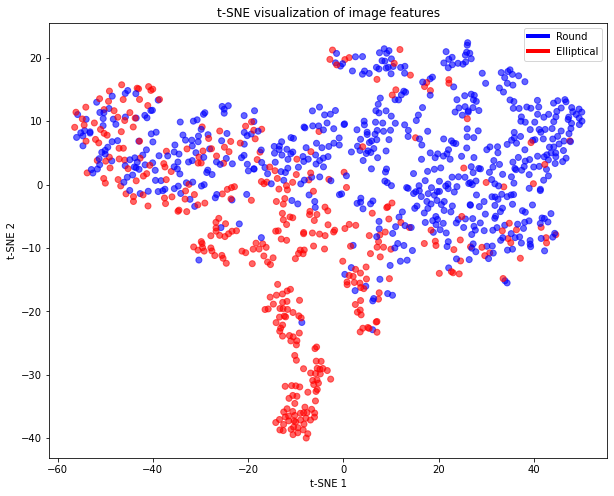

In [ ]:
import matplotlib.pyplot as plt

# Prepare your plot
plt.figure(figsize=(10, 8))

# Assign colors to each label
colors = ['blue', 'red']  # Blue for label 16, Red for label 18
label_colors = {15: 'blue', 17: 'red'}

# Map the filtered selected labels to colors
cmap = np.array([label_colors[label] for label in filtered_selected_labels])

# Create scatter plot
scatter = plt.scatter(filtered_tsne_results[:, 0], filtered_tsne_results[:, 1], c=cmap, alpha=0.6)

# Create custom legends
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]

plt.legend(custom_lines, ['Round', 'Elliptical'])

# Title and labels
plt.title('t-SNE visualization of image features')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Display the plot
plt.show()


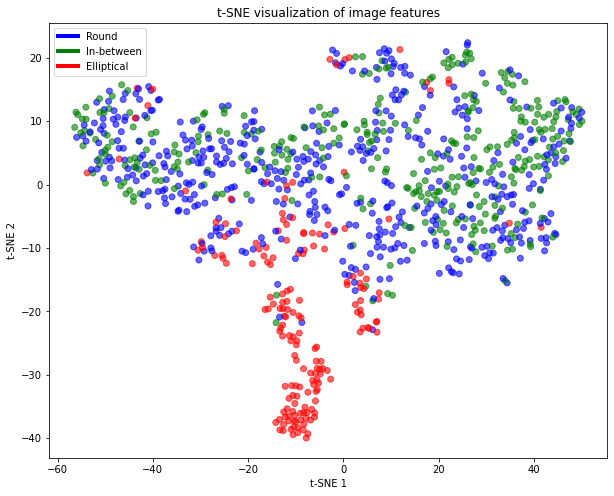

In [ ]:
import matplotlib.pyplot as plt

# Prepare your plot
plt.figure(figsize=(10, 8))

# Assign colors to each label
colors = ['green', 'blue', 'red']  # Green for label 15, Blue for label 16, Red for label 17
label_colors = {15: 'green', 16: 'blue', 17: 'red'}

# Assuming 'selected_labels' contains only labels 15, 16, and 17 and has been chosen based on highest probabilities
# for each datapoint from the prob_labels array corresponding to columns 15, 16, and 17.
selected_labels = np.argmax(prob_labels[:, [15, 16, 17]], axis=1) + 15  # +15 adjusts indices to match actual label numbers

# Map the selected labels to colors
cmap = np.array([label_colors[label] for label in selected_labels])

# Create scatter plot
scatter = plt.scatter(filtered_tsne_results[:, 0], filtered_tsne_results[:, 1], c=cmap, alpha=0.6)

# Create custom legends
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4)]

plt.legend(custom_lines, ['Round', 'In-between', 'Elliptical'])

# Title and labels
plt.title('t-SNE visualization of image features')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Display the plot
plt.show()


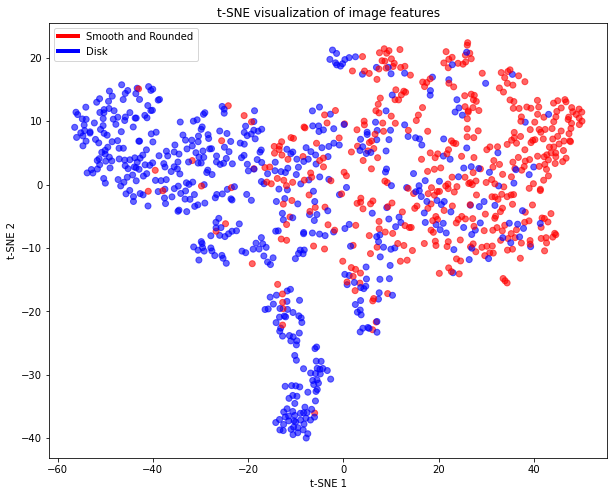

In [ ]:
import matplotlib.pyplot as plt

# Prepare your plot
plt.figure(figsize=(10, 8))

# Assign colors to each label
colors = ['red', 'blue']  # Green for label 15, Blue for label 16, Red for label 17
label_colors = {0: 'red', 1: 'blue'}

# Assuming 'selected_labels' contains only labels 15, 16, and 17 and has been chosen based on highest probabilities
# for each datapoint from the prob_labels array corresponding to columns 15, 16, and 17.
selected_labels = np.argmax(prob_labels[:, [0, 1]], axis=1)  # +15 adjusts indices to match actual label numbers

# Map the selected labels to colors
cmap = np.array([label_colors[label] for label in selected_labels])

# Create scatter plot
scatter = plt.scatter(filtered_tsne_results[:, 0], filtered_tsne_results[:, 1], c=cmap, alpha=0.6)

# Create custom legends
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

plt.legend(custom_lines, ['Smooth and Rounded', 'Disk'])

# Title and labels
plt.title('t-SNE visualization of image features')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Display the plot
plt.show()


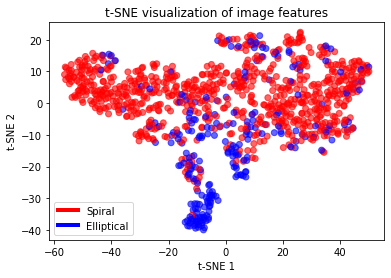

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'features' and 'prob_labels' are already loaded

# Filter for labels 7 and 17
selected_labels = np.argmax(prob_labels[:, [7, 17]], axis=1)

# Update selected labels to reflect the actual label numbers
selected_labels = np.where(selected_labels == 0, 7, 17)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)
label_colors = {7: 'red', 17: 'blue'}

# Map the selected labels to colors
cmap = np.array([label_colors[label] for label in selected_labels])

# Create scatter plot
scatter = plt.scatter(filtered_tsne_results[:, 0], filtered_tsne_results[:, 1], c=cmap, alpha=0.6)

# Create custom legends
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

plt.legend(custom_lines, ['Spiral', 'Elliptical'])

# Title and labels
plt.title('t-SNE visualization of image features')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Display the plot
plt.show()

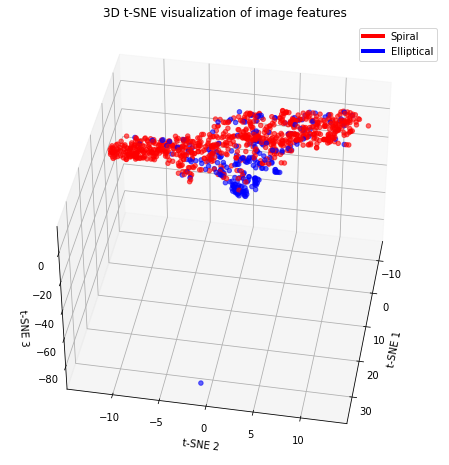

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Assuming 'features' and 'prob_labels' are already loaded

# Filter for labels 7 and 17
selected_labels = np.argmax(prob_labels[:, [7, 17]], axis=1)

# Update selected labels to reflect the actual label numbers
selected_labels = np.where(selected_labels == 0, 7, 17)

# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(features)

# Mapping the selected labels to colors
label_colors = {7: 'red', 17: 'blue'}
cmap = np.array([label_colors[label] for label in selected_labels])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=cmap, alpha=0.6)

# Create custom legends
custom_lines = [Line2D([0], [0], color='red', lw=4, label='Spiral'),
                Line2D([0], [0], color='blue', lw=4, label='Elliptical')]
ax.legend(handles=custom_lines)

# Title and labels
ax.set_title('3D t-SNE visualization of image features')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.view_init(elev=40, azim=10)

# Display the plot
plt.show()


1/1 [==============================] - 1s 512ms/step


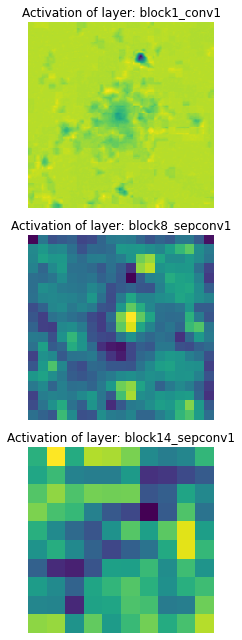

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def get_activation_maps(image_path, model, layers):
    img = preprocess_image(image_path)  # Ensure this uses the same preprocessing used during training
    # Create models for each layer output
    layer_outputs = [model.get_layer(layer).output for layer in layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    # Get activations
    with tf.device('/CPU:0'):
        activations = activation_model.predict(img)

    fig, axes = plt.subplots(nrows=len(layers), figsize=(20, len(layers) * 3))
    for i, activation in enumerate(activations):
        ax = axes[i] if len(layers) > 1 else axes
        ax.imshow(activation[0, :, :, 0], cmap='viridis')
        ax.set_title(f'Activation of layer: {layers[i]}')
        ax.axis('off')
    plt.tight_layout()
    return fig

# Example usage
layers_of_interest = ['block1_conv1', 'block8_sepconv1', 'block14_sepconv1']
fig = get_activation_maps('images_training_rev1/100008.jpg', model, layers_of_interest)
plt.show()


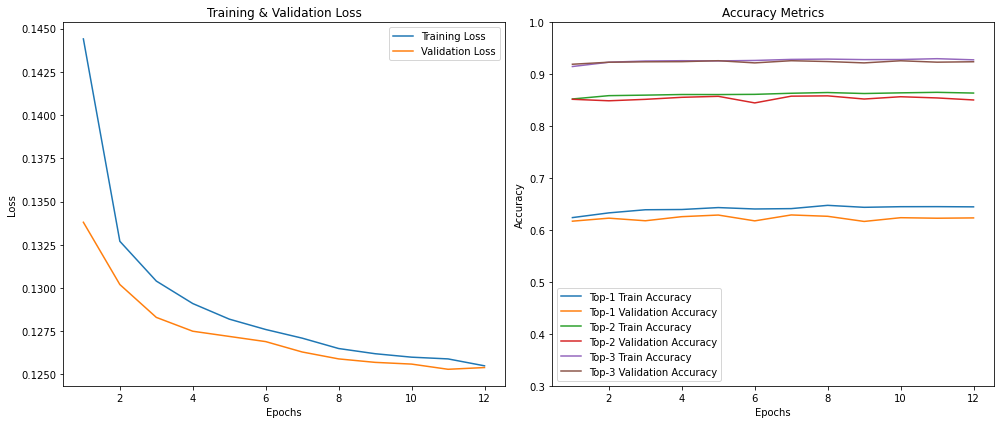

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the history of your training stored in a variable called `history`.
# If you've logged the history directly as shown in your training logs, you can manually input the values as follows:

# Sample data from your training logs
epochs = list(range(1, 13))  # Adjust based on the number of epochs you eventually complete
train_loss = [0.1444, 0.1327, 0.1304, 0.1291, 0.1282, 0.1276, 0.1271, 0.1265, 0.1262, 0.1260, 0.1259, 0.1255]
val_loss = [0.1338, 0.1302, 0.1283, 0.1275, 0.1272, 0.1269, 0.1263, 0.1259, 0.1257, 0.1256, 0.1253, 0.1254]
train_accuracy = [0.6240, 0.6331, 0.6391, 0.6396, 0.6433, 0.6406, 0.6413, 0.6476, 0.6438, 0.6450, 0.6451, 0.6447]
val_accuracy = [0.6171, 0.6229, 0.6179, 0.6258, 0.6289, 0.6177, 0.6291, 0.6265, 0.6166, 0.6238, 0.6228, 0.6234]
top_2_train_accuracy = [0.8525, 0.8589, 0.8599, 0.8611, 0.8610, 0.8614, 0.8635, 0.8649, 0.8630, 0.8643, 0.8653, 0.8639]
top_2_val_accuracy = [0.8519, 0.8490, 0.8518, 0.8557, 0.8576, 0.8449, 0.8579, 0.8585, 0.8524, 0.8568, 0.8545, 0.8506]
top_3_train_accuracy = [0.9150, 0.9233, 0.9256, 0.9262, 0.9258, 0.9267, 0.9287, 0.9293, 0.9283, 0.9285, 0.9301, 0.9279]
top_3_val_accuracy = [0.9194, 0.9233, 0.9241, 0.9244, 0.9262, 0.9220, 0.9262, 0.9246, 0.9220, 0.9261, 0.9234, 0.9242]

# Loss Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Top-1 Train Accuracy')
plt.plot(epochs, val_accuracy, label='Top-1 Validation Accuracy')
plt.plot(epochs, top_2_train_accuracy, label='Top-2 Train Accuracy')
plt.plot(epochs, top_2_val_accuracy, label='Top-2 Validation Accuracy')
plt.plot(epochs, top_3_train_accuracy, label='Top-3 Train Accuracy')
plt.plot(epochs, top_3_val_accuracy, label='Top-3 Validation Accuracy')
plt.title('Accuracy Metrics')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.3,1)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input

def preprocess_image(image_path, target_size=(299, 299)):
    """ Load and preprocess an image. """
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Define the directory containing your test images
image_folder = 'data/images_test_rev1'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# Prepare DataFrame to collect predictions
predictions_df = pd.DataFrame(columns=['GalaxyID'] + ['Class' + str(i) for i in range(1, 38)])

# Generate predictions for each image
for filename in image_files:
    image_path = os.path.join(image_folder, filename)
    with tf.device('/CPU:0'):
        img = preprocess_image(image_path)
        prediction = model.predict(img)[0]  # Get the first (and only) prediction
        temp_df = pd.DataFrame([[filename.split('.')[0]] + prediction.tolist()], columns=['GalaxyID'] + ['Class' + str(i) for i in range(1, 38)])
        predictions_df = pd.concat([predictions_df, temp_df], ignore_index=True)

# Save predictions to CSV
predictions_df.to_csv('test_predictions.csv', index=False)

1/1 [==============================] - 0s 143ms/step


/tmp/ipykernel_147/2009145643.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, temp_df], ignore_index=True)


1/1 [==============================] - 0s 155ms/step
